In [1]:
list.files(recursive="True")

[1] "base.ipynb"                    "Basic Ecnometrics.ipynb"      
[3] "Data/DataFile.xlsx"            "Data/Panel101.dta"            
[5] "Group2.ipynb"                  "prof.ipynb"                   
[7] "Study Material/ADM_SESSION2.R" "Study Material/Panel101R.pdf"

In [3]:
library(foreign)

In [5]:
df=read.dta("./Data/Panel101.dta")

In [6]:
head(df)

country,year,y,y_bin,x1,x2,x3,opinion
A,1990,1342787840,1,0.2779036,-1.1079559,0.28255358,Str agree
A,1991,-1899660544,0,0.3206847,-0.9487200,0.49253848,Disag
A,1992,-11234363,0,0.3634657,-0.7894840,0.70252335,Disag
A,1993,2645775360,1,0.2461440,-0.8855330,-0.09439092,Disag
A,1994,3008334848,1,0.4246230,-0.7297683,0.94613063,Disag
A,1995,3229574144,1,0.4772141,-0.7232460,1.02968037,Str agree


In [8]:
library(plm)
df=pdata.frame(df, index = c("country", "year"))
pdim(df)
make.pbalanced(unbal, balance.type = "fill",index = c("country", "year") )

Balanced Panel: n = 7, T = 10, N = 70

ERROR: Error in make.pbalanced(unbal, balance.type = "fill", index = c("country", : object 'unbal' not found


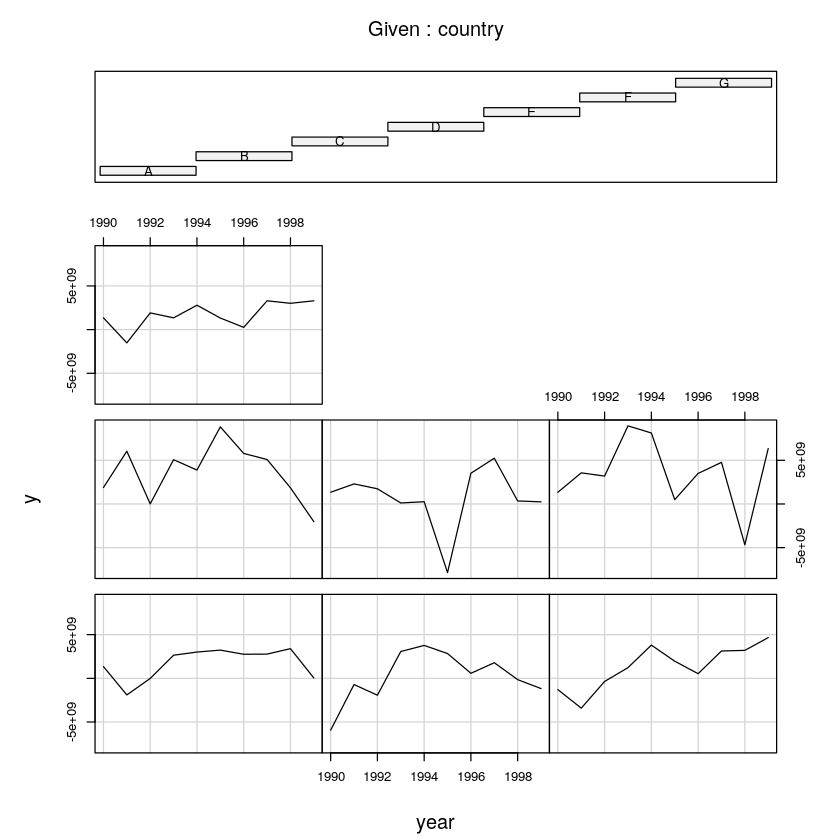

In [5]:
coplot(y~year|country, type="l", data=df)

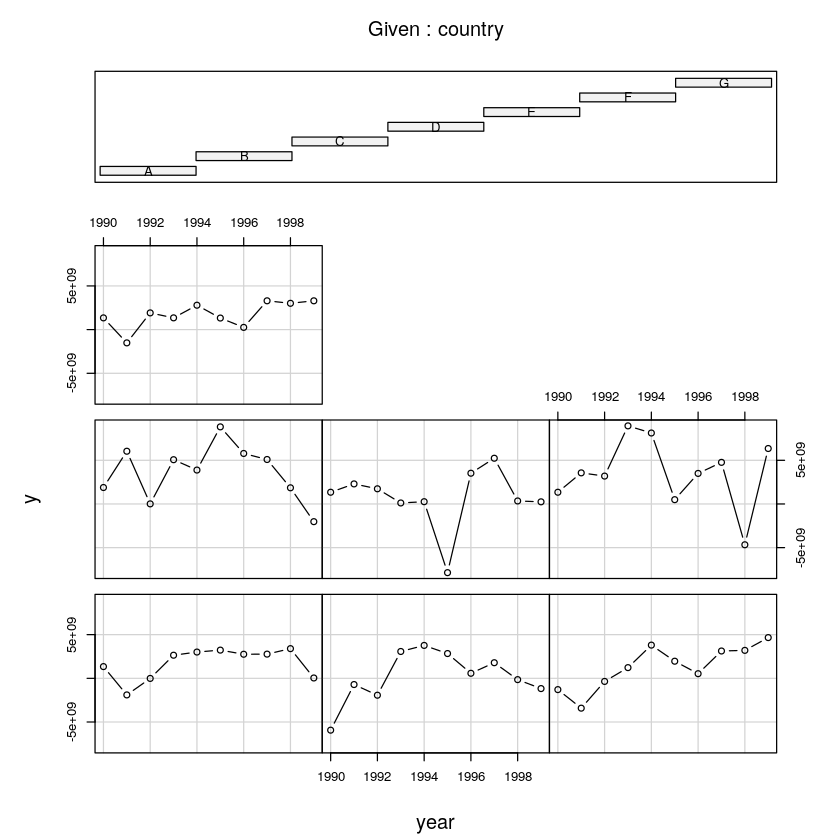

In [6]:
coplot(y~year|country, type="b", data=df)

Loading required package: carData


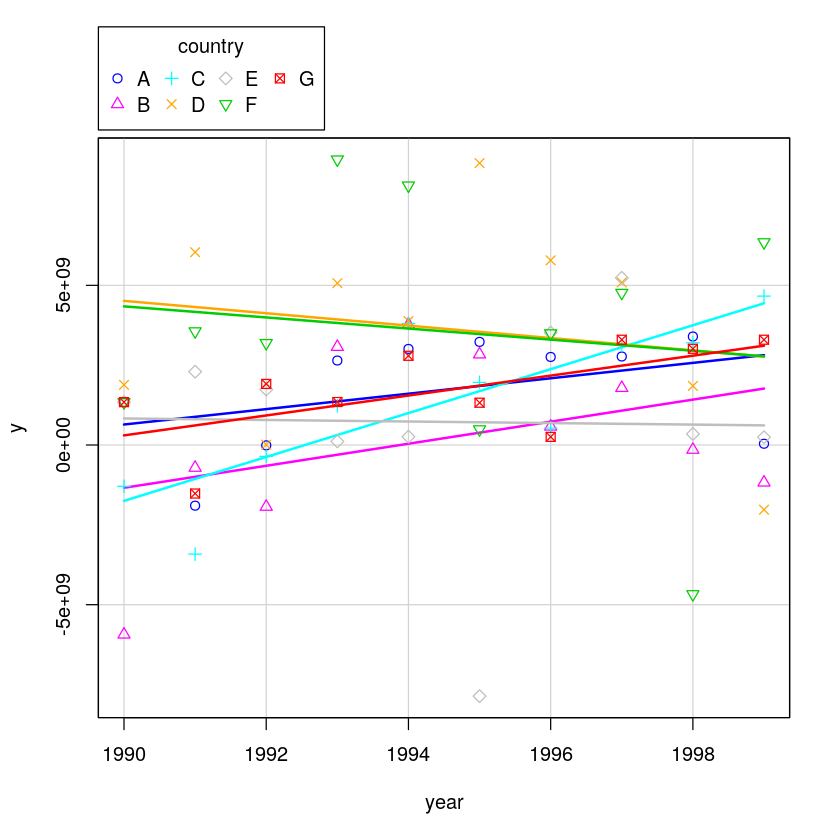

In [7]:
library(car)
scatterplot(y~year|country, data =df, smooth = F, boxplots = TRUE)


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



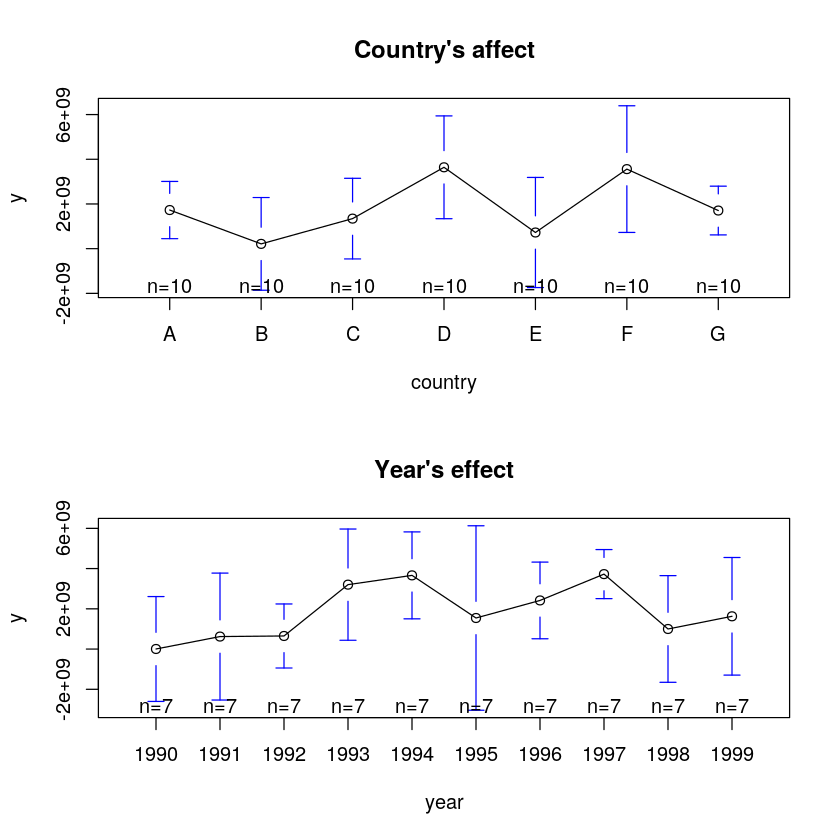

In [8]:
library(gplots)
par(mfrow=c(2,1))
plotmeans(y~country, main="Country's affect", data=df)
plotmeans(y~year, main="Year's effect", data =df)

# Ending EDA

###----------------------------------------------------------

In [9]:
library(plm)
head(df)

Loading required package: Formula


country,year,y,y_bin,x1,x2,x3,opinion
A,1990,1342787840,1,0.2779036,-1.1079559,0.28255358,Str agree
A,1991,-1899660544,0,0.3206847,-0.9487200,0.49253848,Disag
A,1992,-11234363,0,0.3634657,-0.7894840,0.70252335,Disag
A,1993,2645775360,1,0.2461440,-0.8855330,-0.09439092,Disag
A,1994,3008334848,1,0.4246230,-0.7297683,0.94613063,Disag
A,1995,3229574144,1,0.4772141,-0.7232460,1.02968037,Str agree


# 2.  Starting Panel OLS

1. Pooling OLS
2. Fixed Effect (LSDV) 
3. Fixed Effect (Within Mean Diff) 
4. Fixed Effect (First Diff) 
5. Random Effect

## 2.1 Pooling OLS

In [35]:
ols=lm(y~x1+x2+x3, data=df)
pool=plm(y~x1+x2+x3, index=c("country", "year"), data=df, model="pooling")

summary(pool)

Pooling Model

Call:
plm(formula = y ~ x1 + x2 + x3, data = df, model = "pooling", 
    index = c("country", "year"))

Balanced Panel: n = 7, T = 10, N = 70

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-9.50e+09 -1.62e+09  1.74e+08  0.00e+00  1.50e+09  7.36e+09 

Coefficients:
              Estimate Std. Error t-value Pr(>|t|)  
(Intercept) 1400527665  762362572  1.8371   0.0707 .
x1           559063957  915594368  0.6106   0.5436  
x2            87445761  349461177  0.2502   0.8032  
x3            92622347  293654989  0.3154   0.7534  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    6.2729e+20
Residual Sum of Squares: 6.2251e+20
R-Squared:      0.0076238
Adj. R-Squared: -0.037484
F-statistic: 0.169012 on 3 and 66 DF, p-value: 0.91693

#### Result:

* Adjusted R makes no sense
* DRopping this model

## 2.2 Fixed effect LSDV using LM
* What gets fixed ?
* Country

In [11]:
fixed_lsdv=lm(y~x1+x2+x3+factor(country)-1, data=df)
fixed_lsdv_plm=plm(y~x1+x2+x3, index=c("country", "year"), data=df)
summary(fixed_lsdv_plm)

Oneway (individual) effect Within Model

Call:
plm(formula = y ~ x1 + x2 + x3, data = df, index = c("country", 
    "year"))

Balanced Panel: n = 7, T = 10, N = 70

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.31e+09 -1.12e+09  5.02e+08  0.00e+00  1.37e+09  6.31e+09 

Coefficients:
     Estimate Std. Error t-value Pr(>|t|)  
x1 2424529174 1156516240  2.0964  0.04027 *
x2 1822699670 2028055946  0.8987  0.37238  
x3  309718343  368552481  0.8404  0.40404  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    5.2364e+20
Residual Sum of Squares: 4.708e+20
R-Squared:      0.10092
Adj. R-Squared: -0.033937
F-statistic: 2.24507 on 3 and 60 DF, p-value: 0.092235

#### Result:

* Good to get adjusted R square as +ve
* Bad that countries dummies areuseless.

## 2.2. Fixed effect (Within Group mean diff)

In [12]:
fixed_mean=plm(y~x1+x2+x3,index=c("country", "year"),data=df, model="within")
summary(fixed_mean)

Oneway (individual) effect Within Model

Call:
plm(formula = y ~ x1 + x2 + x3, data = df, model = "within", 
    index = c("country", "year"))

Balanced Panel: n = 7, T = 10, N = 70

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.31e+09 -1.12e+09  5.02e+08  0.00e+00  1.37e+09  6.31e+09 

Coefficients:
     Estimate Std. Error t-value Pr(>|t|)  
x1 2424529174 1156516240  2.0964  0.04027 *
x2 1822699670 2028055946  0.8987  0.37238  
x3  309718343  368552481  0.8404  0.40404  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    5.2364e+20
Residual Sum of Squares: 4.708e+20
R-Squared:      0.10092
Adj. R-Squared: -0.033937
F-statistic: 2.24507 on 3 and 60 DF, p-value: 0.092235

#### Results: 
* Adjusted R square is useless
* It seems random effect is the only option

## 2.4. Fixed effect (First Diff)

In [13]:
fixed_diff=plm(y~x1+x2+x3,index=c("country", "year"),data=df, model="fd")
summary(fixed_diff)

Oneway (individual) effect First-Difference Model

Call:
plm(formula = y ~ x1 + x2 + x3, data = df, model = "fd", index = c("country", 
    "year"))

Balanced Panel: n = 7, T = 10, N = 70
Observations used in estimation: 63

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-9.45e+09 -1.31e+09 -1.72e+08  1.65e+08  1.76e+09  9.82e+09 

Coefficients:
     Estimate Std. Error t-value Pr(>|t|)  
x1  467355285 1520510564  0.3074  0.75963  
x2 5141858601 2122885745  2.4221  0.01847 *
x3 -179181031  768948504 -0.2330  0.81654  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    8.5496e+20
Residual Sum of Squares: 7.329e+20
R-Squared:      0.14478
Adj. R-Squared: 0.11627
F-statistic: 4.99642 on 2 and 60 DF, p-value: 0.0098385

#### Result
* This is used to remove auto correlation
* If no auto correlation is present, it will bring one.
* To be used in caution
* Adjusted R squared much better

## 2.5.  Random effect model
* No dummy will be used,
* Episolon will be introduced in the residula to compensate for the space.

In [14]:
random=plm(y~x1, index=c("country", "year"), data=df, model = "random")
summary(random)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = y ~ x1, data = df, model = "random", index = c("country", 
    "year"))

Balanced Panel: n = 7, T = 10, N = 70

Effects:
                    var   std.dev share
idiosyncratic 7.815e+18 2.796e+09 0.873
individual    1.133e+18 1.065e+09 0.127
theta: 0.3611

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.94e+09 -1.51e+09  2.82e+08  0.00e+00  1.56e+09  6.63e+09 

Coefficients:
              Estimate Std. Error t-value Pr(>|t|)
(Intercept) 1037014284  790626206  1.3116   0.1941
x1          1247001782  902145601  1.3823   0.1714

Total Sum of Squares:    5.6595e+20
Residual Sum of Squares: 5.5048e+20
R-Squared:      0.02733
Adj. R-Squared: 0.013026
F-statistic: 1.91065 on 1 and 68 DF, p-value: 0.17141

# Ending Regression
## ---------------------------------------------------------------

# 3. Testing models

## Startig IF-Else  Choice Ladder

1. BP test to test check stocahstocity of residuals/error
    * H0: Nullity of variance
    * If variance are constant use pooling no need to use any effect.
2. Hausman test to choose random or fixed model
    * H0: Random effect
3. Contemporaus corelation for large time and less sapce 
    * H0: No correlation of resisuals between spaces   
4. Pftest 
5. Serial correlation (Durbin Watson, Breuch-Goodfref,ACF Overkill) 
6. Unit root test
7. BP test for simple effect of space

## 3.1 BP test

In [15]:
pool=plm(y~x1, index=c("country", "year"), data=df, model="pooling")
plmtest(pool, type=c("bp"))


	Lagrange Multiplier Test - (Breusch-Pagan) for balanced panels

data:  y ~ x1
chisq = 2.6692, df = 1, p-value = 0.1023
alternative hypothesis: significant effects


#### Result:
* H0 not rejected, so H0 is winner
* Hence no change of variance on residuals were detected.
* Continue with pooiling and stop here

* But, on perfroming for own 

## 3.2. Hausman test (F vs R)

In [16]:
phtest(fixed_lsdv_plm, random)


	Hausman Test

data:  y ~ x1 + x2 + x3
chisq = 2.6478, df = 1, p-value = 0.1037
alternative hypothesis: one model is inconsistent


#### Result
* Cannot reject H0, so H0 wins
* Random effect present so we will use random effect

## 3.3. Contemporaous correlation (Cross sectional dependece ex: states of India)
* for large time and less sapce 
    * H0: No correlation of resisuals between spaces
    
* If you ant to find time correlation fix the sapce, so use only fixed models

In [17]:
pcdtest(fixed_lsdv_plm, test = c("lm")) ## Can use cd too


	Breusch-Pagan LM test for cross-sectional dependence in panels

data:  y ~ x1 + x2 + x3
chisq = 23.778, df = 21, p-value = 0.3039
alternative hypothesis: cross-sectional dependence


## 3.4. F Test (is Naive OLS better ?)
* H0: OLS is better

In [18]:
pFtest(fixed_lsdv_plm, ols)


	F test for individual effects

data:  y ~ x1 + x2 + x3
F = 3.2225, df1 = 6, df2 = 60, p-value = 0.008242
alternative hypothesis: significant effects


In [19]:
pFtest(fixed_mean, ols)


	F test for individual effects

data:  y ~ x1 + x2 + x3
F = 3.2225, df1 = 6, df2 = 60, p-value = 0.008242
alternative hypothesis: significant effects


In [20]:
pFtest(fixed_diff, ols)


	F test for individual effects

data:  y ~ x1 + x2 + x3
F = -1.5061, df1 = 6, df2 = 60, p-value = 1
alternative hypothesis: significant effects


In [21]:
pFtest(random, ols)

Warning message in pf(stat, df1, df2, lower.tail = FALSE):
“NaNs produced”


	F test for individual effects

data:  y ~ x1
F = -4.4489, df1 = -2, df2 = 68, p-value = NA
alternative hypothesis: significant effects


## 3.5. Serial correaltion (auto correlation)

In [22]:
pbgtest(fixed_lsdv_plm) # H0 wins here


	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  y ~ x1 + x2 + x3
chisq = 17.372, df = 10, p-value = 0.06653
alternative hypothesis: serial correlation in idiosyncratic errors


## 3.6. Unit root test (Series staionary or not)

In [23]:
# Set data as plm object first 
dfp=plm.data(df, indexes = c("country", "year"))
# dfp=pdata.frame(df, indexes = c("country", "year"))
library(tseries)
adf.test(dfp$y, k=2)

Warning message:
“use of 'plm.data' is discouraged, better use 'pdata.frame' instead”


	Augmented Dickey-Fuller Test

data:  dfp$y
Dickey-Fuller = -3.9051, Lag order = 2, p-value = 0.0191
alternative hypothesis: stationary


## 3.7. Breusch Pagan Test (standalone module)

In [24]:
library(lmtest)
bptest(y~x1+factor(country), data=df,studentize = F) 
## Effect of space presnt in this mode

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




	Breusch-Pagan test

data:  y ~ x1 + factor(country)
BP = 14.606, df = 7, p-value = 0.04139


In [25]:
plmtest(fixed_lsdv_plm, type=c("bp"))


	Lagrange Multiplier Test - (Breusch-Pagan) for balanced panels

data:  y ~ x1 + x2 + x3
chisq = 3.0745, df = 1, p-value = 0.07953
alternative hypothesis: significant effects


## 4. Plotting models 
* Raw panel will be avoided

1. OLS Plot
2. LSDv Plot 

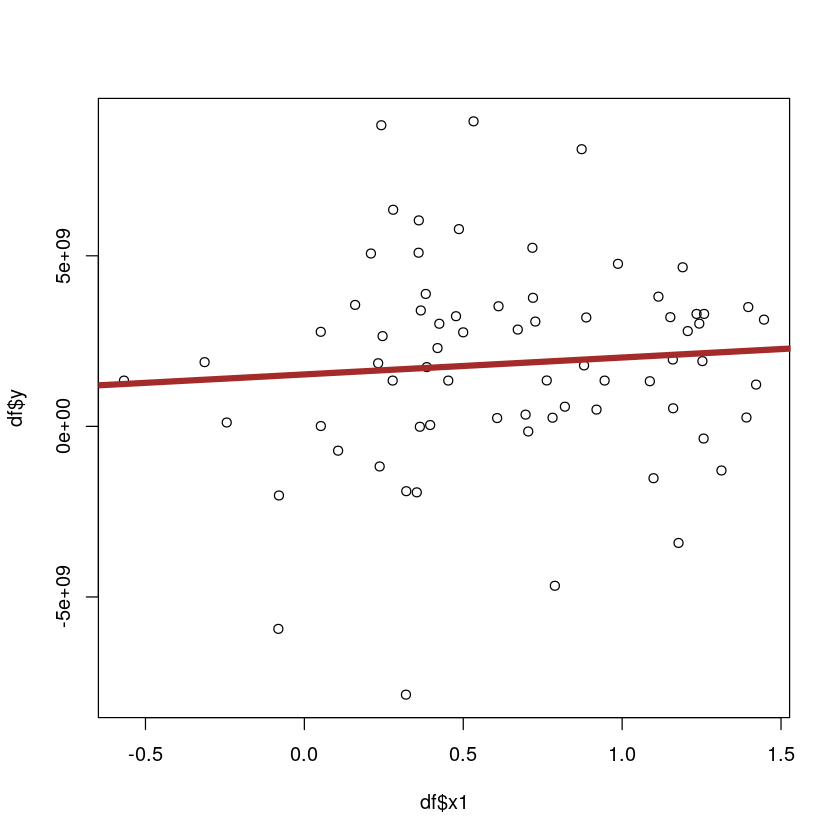

In [26]:
plot(df$x1, df$y)
abline(lm(y~x1, data=df), col="brown", lwd=5)

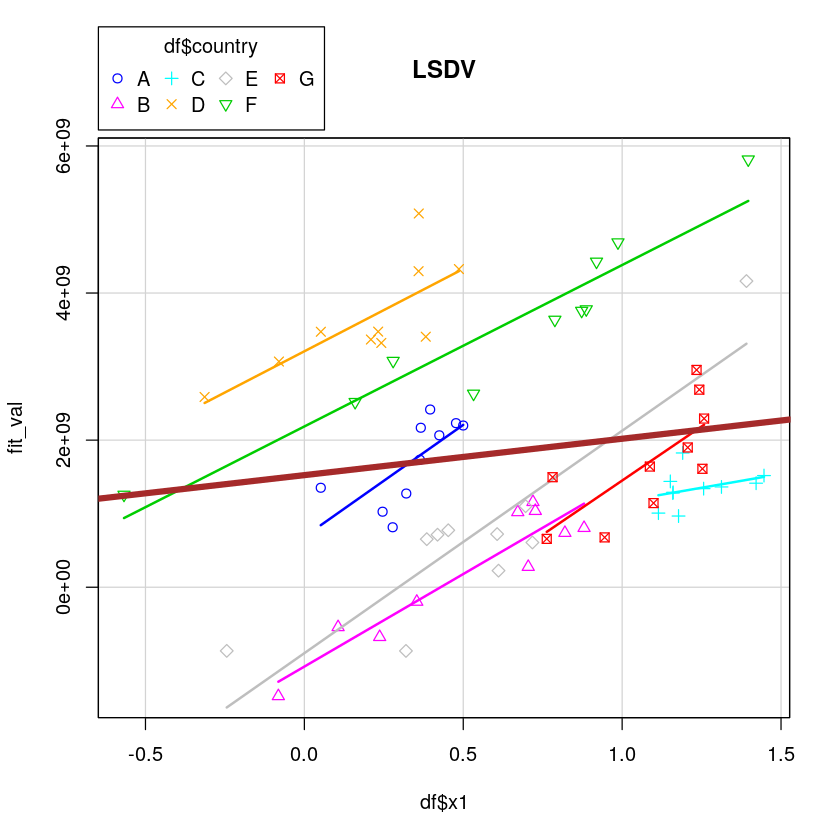

In [27]:
library(car)
fit_val=fixed_lsdv_plm$model$y - fixed_lsdv_plm$residuals
scatterplot(fit_val~df$x1|df$country, boxplots = F, smooth = F, main="LSDV")
abline(lm(y~x1, data=df), col="brown", lwd=5)

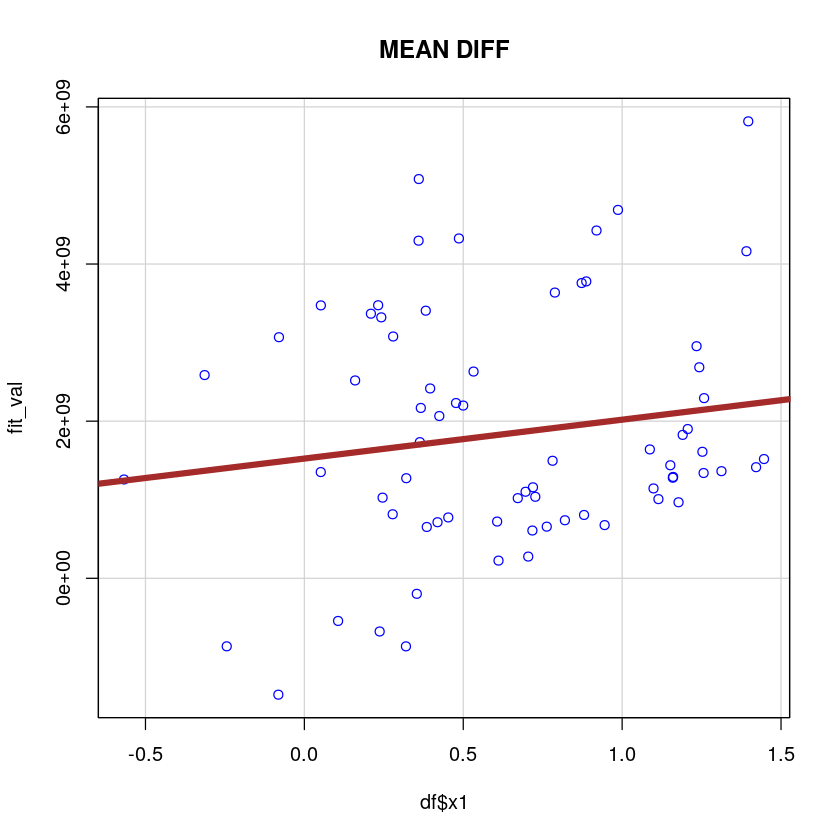

In [28]:
fit_val=fixed_mean$model$y - fixed_mean$residuals
scatterplot(fit_val~df$x1, boxplots = F, smooth = F, main="MEAN DIFF")
abline(lm(y~x1, data=df), col="brown", lwd=5)

Warning message in fixed_diff$model$y - fixed_diff$residuals:
“longer object length is not a multiple of shorter object length”

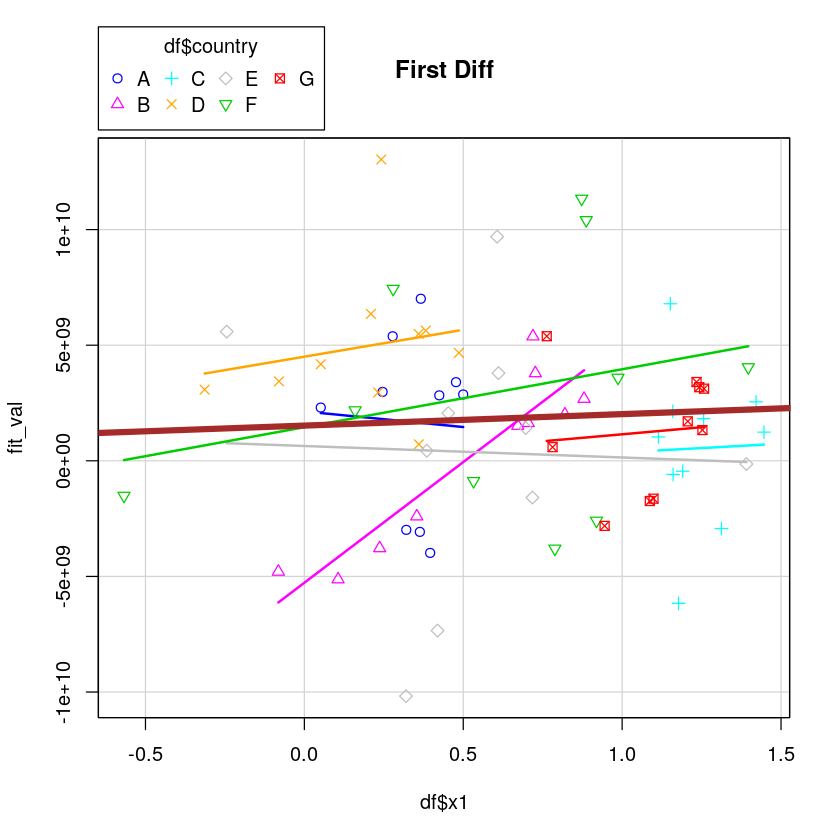

In [29]:
fit_val=fixed_diff$model$y - fixed_diff$residuals
scatterplot(fit_val~df$x1|df$country, boxplots = F, smooth = F, main="First Diff")
abline(lm(y~x1, data=df), col="brown", lwd=5)